In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Загрузите файлы из предоставленного архива в единый датафрейм вида: DATE, SBER,
LKOH, GAZP,MOEX, USD0. Где значения в последних 5-ти колонках являются
значениями курса акций LOW (минимальные значения за день), а значения DATE –
датами с типом TIMESTAMP. Используйте модуль OS.

In [ ]:
!unzip /content/gdrive/MyDrive/LR4_dataproc/TS_decomposition.zip

Archive:  /content/gdrive/MyDrive/LR4_dataproc/TS_decomposition.zip
replace GAZP_200101_240901.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace LKOH_200101_240901.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace MOEXOG_200101_240901.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace SBER_200101_240901.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace USD000000TOD_200101_240901.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
os.listdir()

['.config',
 'gdrive',
 'MOEXOG_200101_240901.txt',
 'LKOH_200101_240901.txt',
 'SBER_200101_240901.txt',
 'GAZP_200101_240901.txt',
 'USD000000TOD_200101_240901.txt',
 'sample_data']

In [ ]:
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    print(f.readlines()[:2])

['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'MOEXOG,D,200103,000000,8789.86,8883.83,8788.59,8853.65,22093556077\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'LKOH,D,200103,000000,6203.5,6294,6185,6294,791658\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'SBER,D,200103,000000,255.97,258.19,253.7,255,35824160\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'GAZP,D,200103,000000,259.1,261.9,257.77,259,34326290\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'USD000000TOD,D,200109,000000,61.3975,61.405,61.1075,61.27,842631000\n']


In [ ]:
'<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n'.split(',')[2:5:2]

['<DATE>', '<OPEN>']

In [ ]:
l=[]
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    l+=[x.split(',')[2:5:2]+[filename[:4]] for x in f.readlines()[1:]]
pd.DataFrame(l)

,0,1,2
0,200103,8789.86,MOEX
1,200106,8872.88,MOEX
2,200108,8892.73,MOEX
3,200109,8946.38,MOEX
4,200110,9023.92,MOEX
...,...,...,...
5695,240605,88.835,USD0
5696,240606,88.74,USD0
5697,240607,88.7675,USD0
5698,240610,88.76,USD0


In [ ]:
l=[]
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    l+=[x.split(',')[2:5:2]+[filename[:4]] for x in f.readlines()[1:]]
df=pd.DataFrame(l,).pivot(index=0,columns=2,values=1)
df=df[df.columns[0:]].astype(float)
df.index=pd.to_datetime(df.index,format='%y%m%d')
df=df.reindex(pd.date_range(df.index[0],df.index[-1],freq='D')).ffill().bfill()
df.head(4)

2,GAZP,LKOH,MOEX,SBER,USD0
2020-01-03,259.10,6203.5,8789.86,255.97,61.3975
2020-01-04,259.10,6203.5,8789.86,255.97,61.3975
2020-01-05,259.10,6203.5,8789.86,255.97,61.3975
2020-01-06,258.91,6300.0,8872.88,254.75,61.3975


Сделайте DATE – индексом, переиндексируйте на полный период (для этого нужно
восстановить пропущенные даты) и восстановите пропущенные значения в каждом
ряде.

In [ ]:
filelist=tuple(filter(lambda x: x.find('.txt')>-1,os.listdir()))
df1=pd.DataFrame()
for filename in filelist:
  tmp=pd.read_csv(filename,usecols=[2,4],names=['DATE',filename[:4]],skiprows=1,parse_dates=[0],date_format='%y%m%d')
  df1=df1.join(tmp.set_index('DATE'),rsuffix='_',how='outer')
df1=df1.reindex(pd.date_range(df1.index[0],df1.index[-1],freq='D')).ffill().bfill()

Визуализировать линейными графиками в одной фигуре для рисования все ряды.
Используйте метод MATPLOTLIB.PYPLOT.SUBPLOTS

<Axes: >

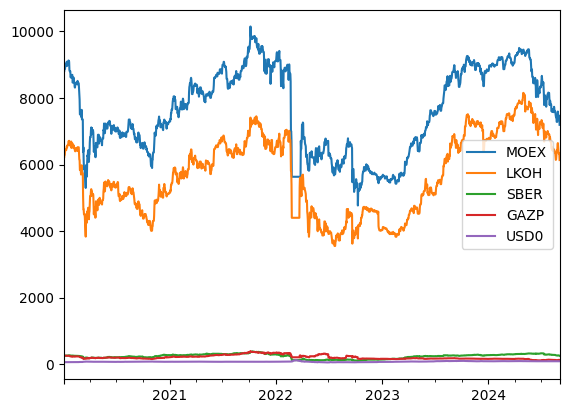

In [ ]:
df1.plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

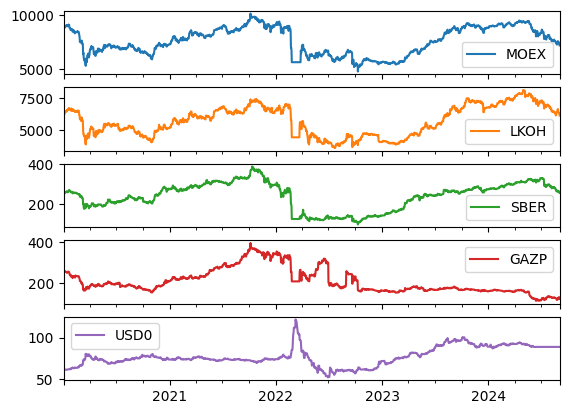

In [ ]:
df1.plot(subplots=True)

In [ ]:
df1.keys()

Index(['MOEX', 'LKOH', 'SBER', 'GAZP', 'USD0'], dtype='object')

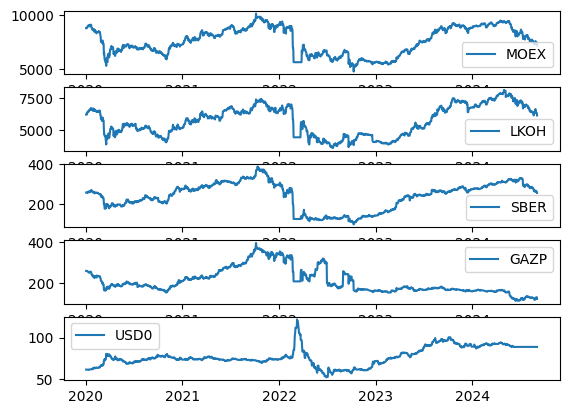

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=5)

for i, key in enumerate(df1.keys()):
    ax[i].plot(df1.index, df1[key], label=key)
    ax[i].legend()

Нормализовать временные ряды и убедиться на визуализации что они стали
сопоставимы. Используйте деление значений ряда на базовое значение (самое раннее
значение в ряду).

<Axes: >

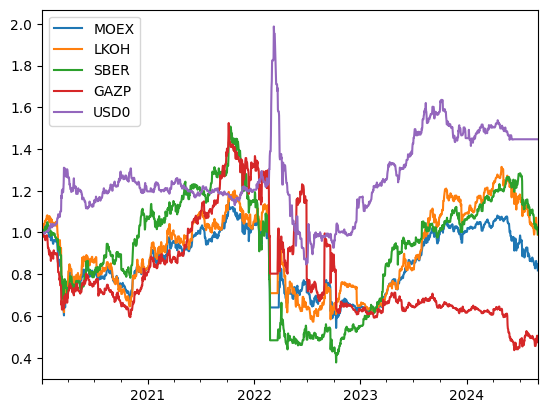

In [ ]:
(df1/df1.head(1).values).plot()

Удалить или сгладить аномалии (выбросы) во временных рядах. Используйте
логарифмирование.

<Axes: >

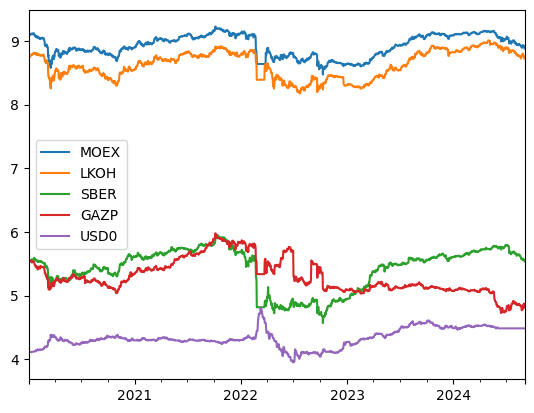

In [ ]:
df1.transform(np.log).plot()

Удалить тренд и визуализировать линейным графиком. Используйте метод DIFF или
SHIFT.

<Axes: >

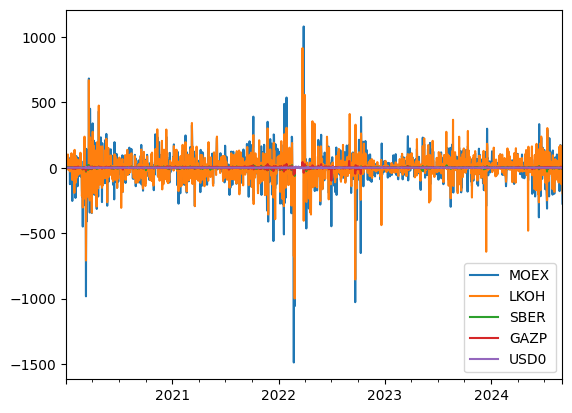

In [ ]:
df1.diff().plot()

<Axes: >

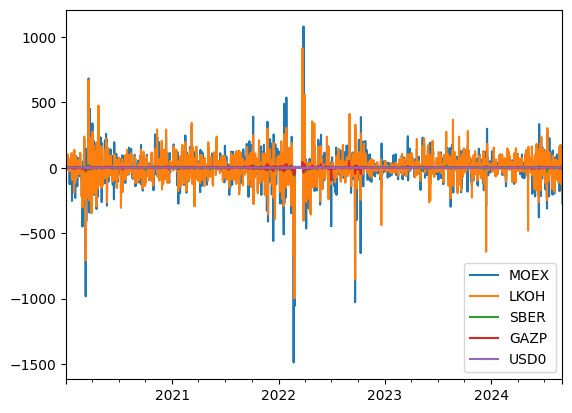

In [ ]:
df1_detrended = df1 - df1.shift(1)
df1_detrended = df1_detrended.dropna()
df1_detrended.plot()

Удалить сезонность в каждом ряде и визуализировать линейным графиком.
Используйте скользящее среднее и метод ROLLING.


<Axes: >

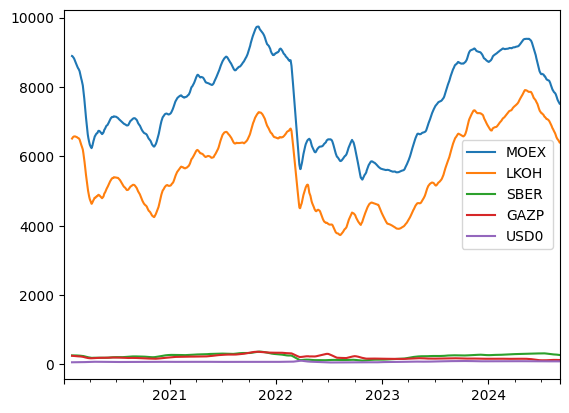

In [ ]:
df1.rolling(30).mean().plot()

Выделить тренд, сезонность, остатки, с помощью аддитивной модели: используя
STATSMODELS.TSA.SEASONAL_DECOMPOSE


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
model=seasonal_decompose(df1.iloc[:,0])

array([<Axes: >, <Axes: >], dtype=object)

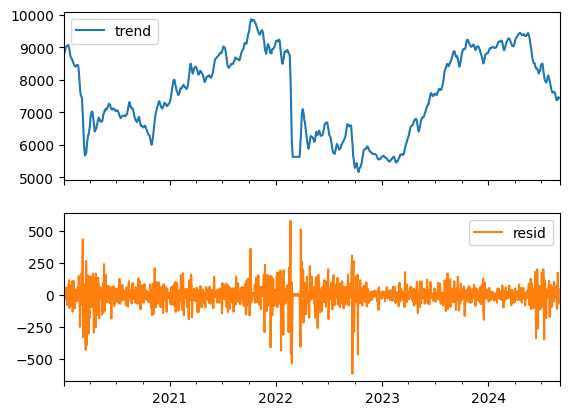

In [ ]:
pd.concat([model.trend, model.resid],axis=1).plot(subplots=True)

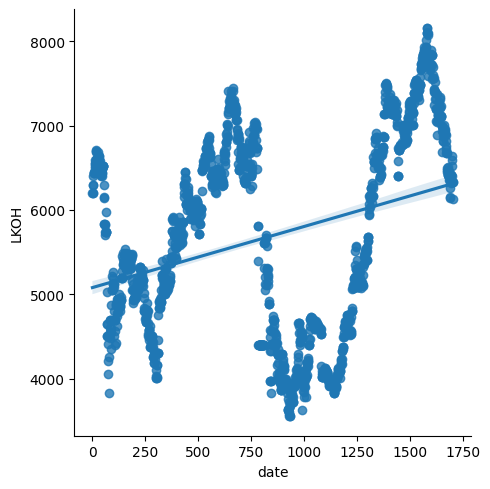

In [ ]:
sns.lmplot(df1.assign(date=range(df1.shape[0])),x='date',y='LKOH')

Рассчитать корреляцию между всеми временными рядами (CORR).

In [ ]:
df1.corr()

,MOEX,LKOH,SBER,GAZP,USD0
MOEX,1.000000,0.950100,0.893657,0.337383,0.406640
LKOH,0.950100,1.000000,0.855881,0.158207,0.518123
SBER,0.893657,0.855881,1.000000,0.257069,0.399295
GAZP,0.337383,0.158207,0.257069,1.000000,-0.389330
USD0,0.406640,0.518123,0.399295,-0.389330,1.000000


Построить кластерную карту (SEABORN.CLUSTERMAP)

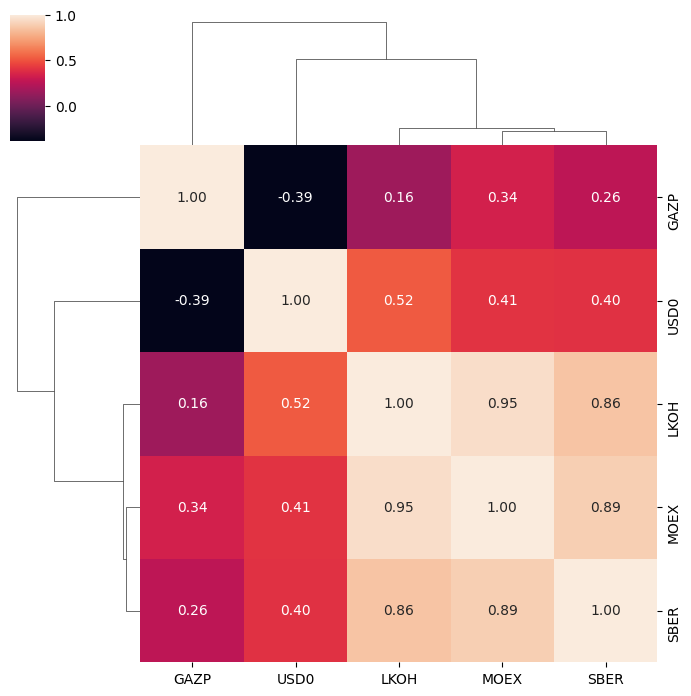

In [ ]:
g = sns.clustermap(df1.corr(), figsize=(7, 7), annot=True, fmt=".2f")